# Final Project!

Introduction:
This personal notebook is to find out which neighborhood has the most frequent fire incidents. I will start by finding the neighborhoods that appear the most times in the chart. Then, I will combine another datasets with area. I will divide the frequency by the area (in acres) to get a ratio for final comparision. 

Metric (only for my personal notebook):
The ratio means the frequency in 1 acre, so whatever the highest ratio means highest frequency of fire incidents, the lowest ratio means lowest frequency of fire incidents. The lowest/highest ratio means best/worst neighborhood area (base on number of fire_incident)

1. Import all the datasets I will have to use

In [8]:
## import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fire_incident = pd.read_csv('pittsburgh_fire_incidents.csv')
neighborhood_area = pd.read_csv('Neighborhood.csv')

2. In the next step, I'm going to start by sorting it simply by numbers of occurance of the neighborhood in the fire incidents data sets (without area data applied)

In [9]:
fire_incident['neighborhood'].value_counts()

Carrick                      255
Central Business District    225
Squirrel Hill South          225
South Side Flats             219
Hazelwood                    213
                            ... 
St. Clair                     11
Mt. Oliver                    10
East Carnegie                 10
Regent Square                  7
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

From the data above we can see, the area where most fire incidents happened is *Carrick*, and the *Mount Oliver Borough* is where the least fire incidents happened.

3. Now I extract the columns of neighborhood name and the area from the big dataset: neighborhood_area, sort them by alphabet

In [10]:
sortedarea = neighborhood_area.sort_values(by = "hood")
sortedareadf = sortedarea[['hood','acres']]
newsortedareadf = sortedareadf.reset_index(drop=True)
newsortedareadf

,hood,acres
0,Allegheny Center,134.703
1,Allegheny West,90.841
2,Allentown,189.608
3,Arlington,302.320
4,Arlington Heights,84.592
...,...,...
85,Upper Lawrenceville,260.349
86,West End,128.679
87,West Oakland,138.372
88,Westwood,445.009


4. combine the frequency data with the area data, and use frequency divide by area to get the ratio, sort them from least to greatest.

In [11]:
new_df = fire_incident.sort_values(["neighborhood"], ascending=True)
fire_incident['neighborhood'].value_counts()

newdf =fire_incident['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')
sorteddf = newdf.sort_values(["neighborhood"], ascending=True)
sortednew = sorteddf.reset_index(drop=True)
mergesorteddata = sortednew.merge(newsortedareadf, left_on = 'neighborhood', right_on = 'hood', suffixes=('frequency', 'acres'))
mergesorteddata.sort_values(['frequency'], ascending=True)
mergesorteddata['ratio'] = mergesorteddata['frequency'] / mergesorteddata['acres']
ratio = mergesorteddata.sort_values(["ratio"], ascending=True)
ratio

,neighborhood,frequency,hood,acres,ratio
37,Hays,18,Hays,1125.478,0.015993
26,East Carnegie,10,East Carnegie,277.895,0.035985
31,Fairywood,23,Fairywood,622.746,0.036933
54,New Homestead,20,New Homestead,510.728,0.039160
81,Swisshelm Park,15,Swisshelm Park,308.575,0.048611
...,...,...,...,...,...
25,East Allegheny,111,East Allegheny,151.705,0.731683
43,Knoxville,146,Knoxville,193.982,0.752647
49,Marshall-Shadeland,119,Marshall-Shadeland,148.209,0.802920
46,Lincoln-Lemington-Belmar,172,Lincoln-Lemington-Belmar,180.105,0.954998


From the new dataset above, according to the ratio: we can see the best neighborhood (with the lowest ratio) is Hays, and the worse neighborhood (with the highest ratio) is Lincoln-Lemington-Belmar. Note that I missing the area data of perry north.

5. display a sample bar plot chart of ratio(the first ten)

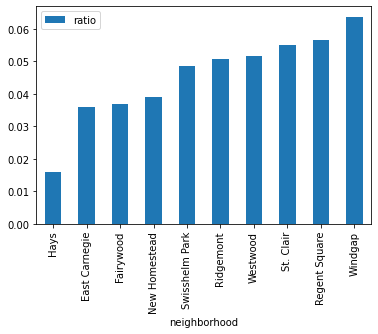

In [15]:
## analyze the frequency by bar plot
plot = ratio.head(10).plot.bar(x='neighborhood', y='ratio')

Conclusion

According to the ratio of frequency/acres, the best neighborhood in Pittsburgh where the least fire incidents happened is Hays. The worst neighborhood inpittsburgh where the most fire incidents happend is Lincoln-Lemington-Belmar.
Overall, my individual work is to analyze where is the best/worst neighborhood base on the frequency of fire incidents. I start by simply count the number of frequency of the neighborhood name, then tank them. In next step, I combine the area data and find out the ratio of frequency/acres. 